<a href="https://www.kaggle.com/code/shakilahmed25/diabetes-prediction-s?scriptVersionId=255815912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
Diabetes_df=pd.read_csv('/kaggle/input/diabetes-prediction/diabetes_prediction_dataset.csv')
Diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
Diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
Diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
Diabetes_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data in dataframe:", Duplicate)

Duplicate Data in dataframe: 3854


In [7]:
row, column=Diabetes_df.shape
print("Row of Dataset:", row)
print("Column of Dataset:", column)

Row of Dataset: 100000
Column of Dataset: 9


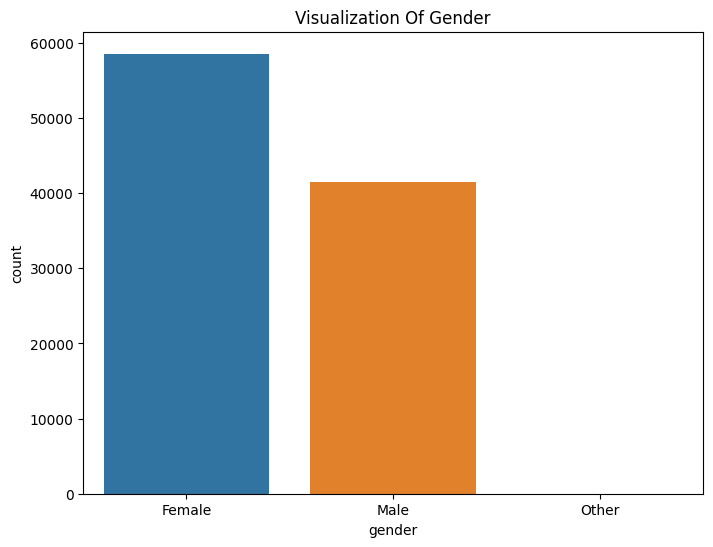

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='gender')
plt.title('Visualization Of Gender')
plt.show()

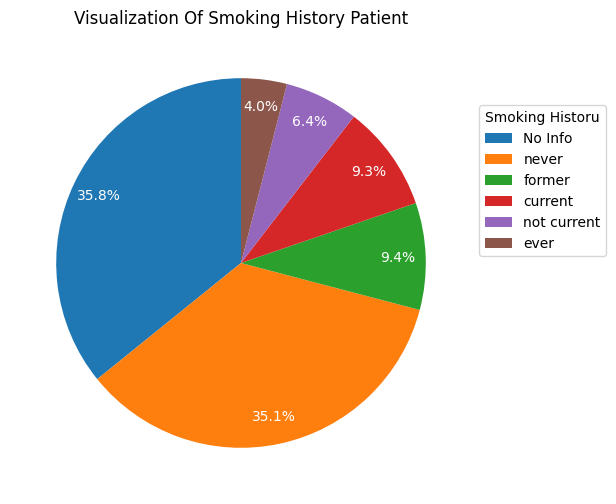

In [9]:
count_smoking= Diabetes_df['smoking_history'].value_counts()

plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Visualization Of Smoking History Patient')
plt.legend(wedges, count_smoking.index, title="Smoking Historu", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

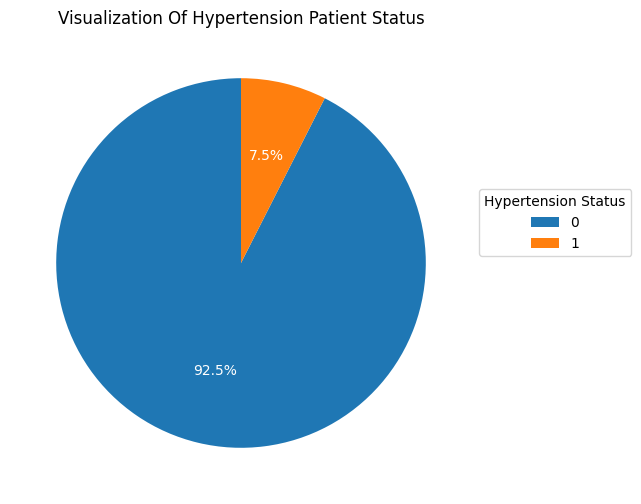

In [10]:
count_hypertension=Diabetes_df['hypertension'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_hypertension.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Hypertension Patient Status')
plt.legend(wedges, count_hypertension.index, title="Hypertension Status", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

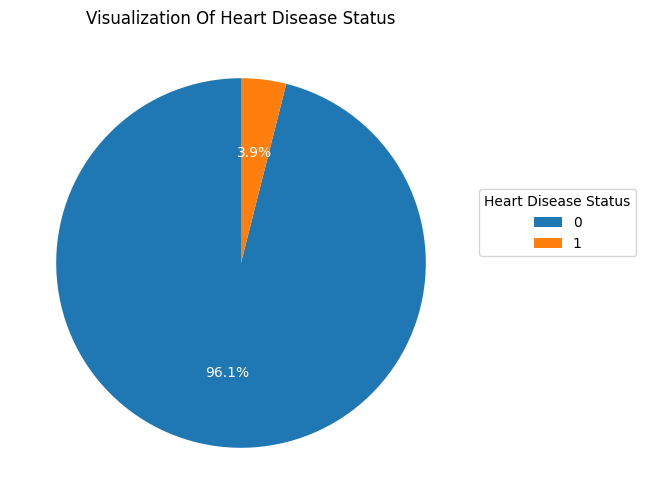

In [11]:
count_heart_disease=Diabetes_df['heart_disease'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_heart_disease.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Heart Disease Status')
plt.legend(wedges, count_heart_disease.index, title="Heart Disease Status", loc="lower left", bbox_to_anchor=((1,0.5)))
plt.show()

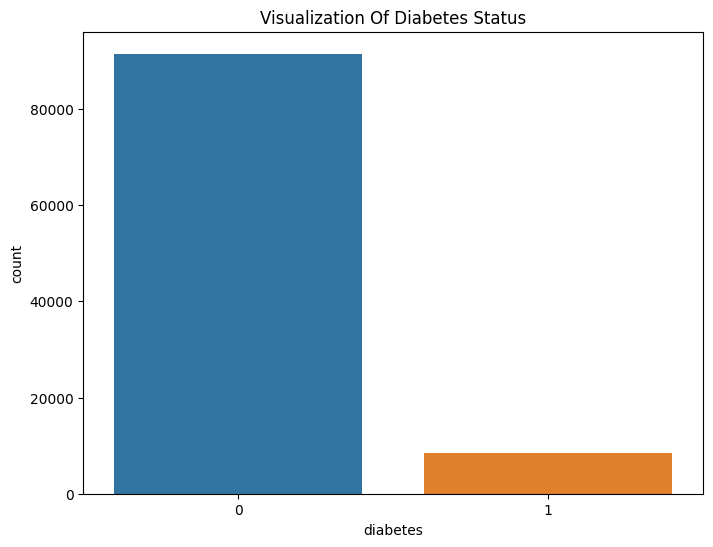

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='diabetes')
plt.title("Visualization Of Diabetes Status")
plt.show()

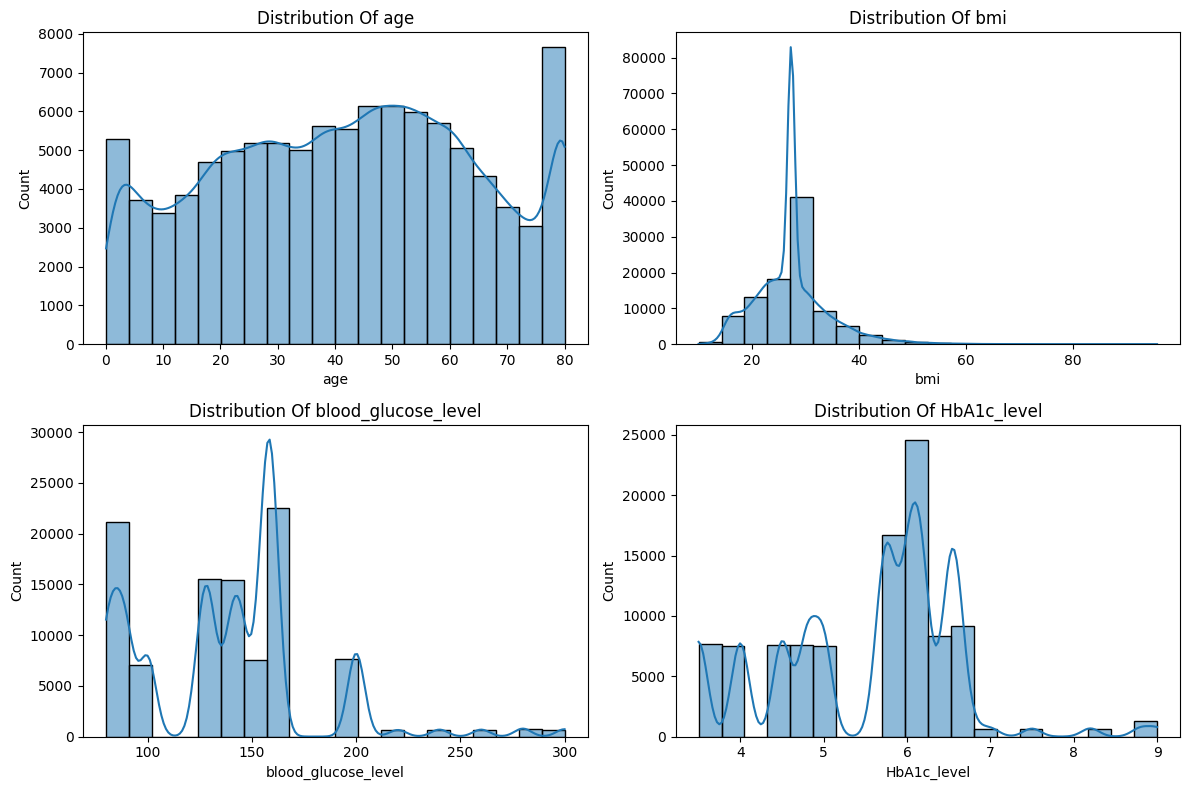

In [13]:
num_cat=['age', 'bmi','blood_glucose_level','HbA1c_level']

fig, axs=plt.subplots(2,2 ,figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.histplot(Diabetes_df[col], bins=20, kde=True, edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribution Of {col}')
    axs[i].set_xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

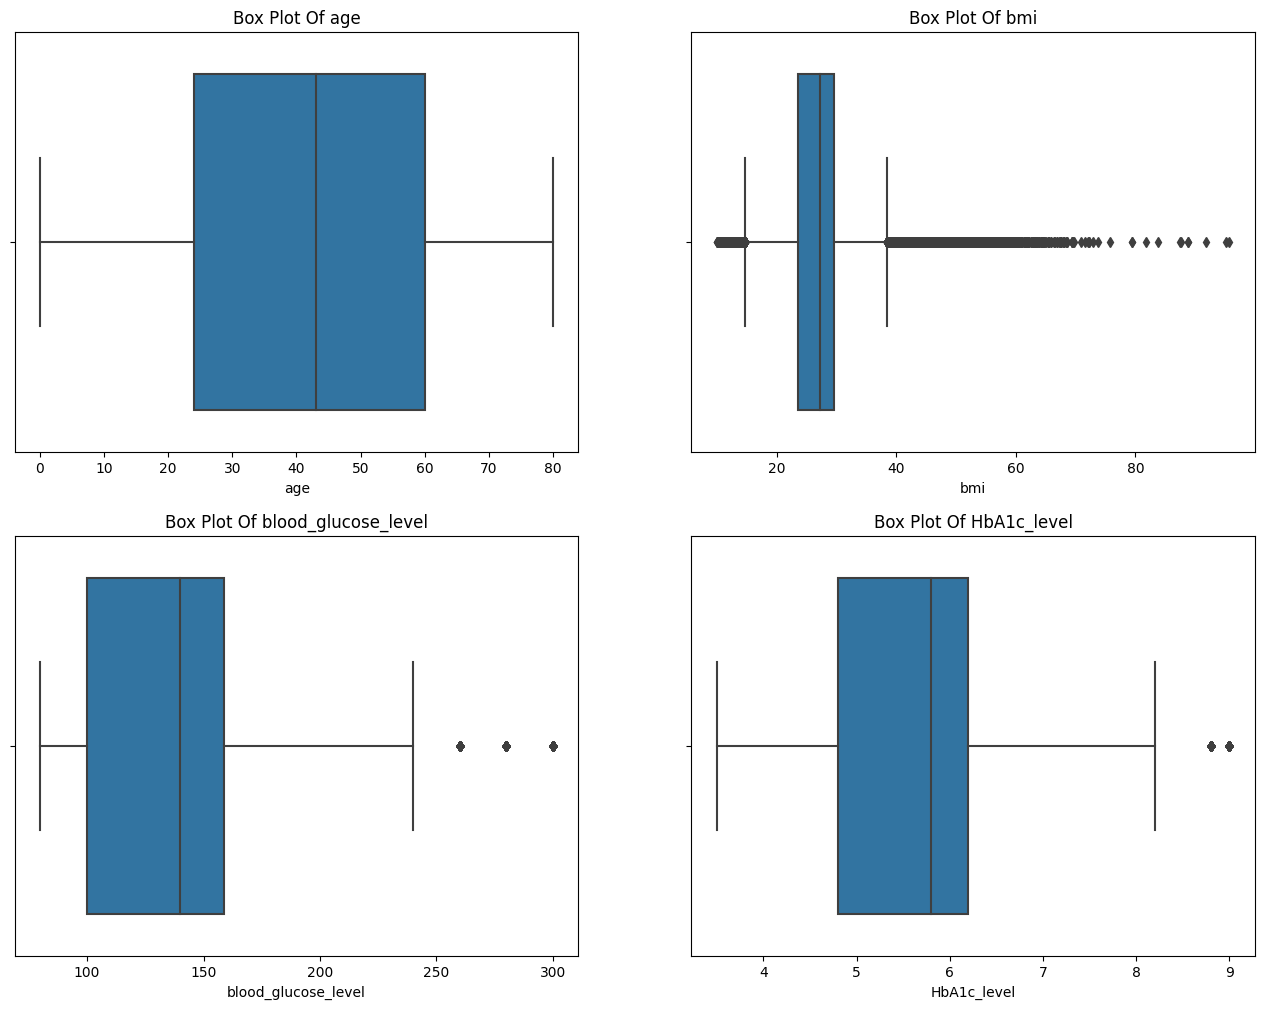

<Figure size 640x480 with 0 Axes>

In [14]:
fig, axs=plt.subplots(2,2, figsize=(16,12))
axs=axs.flatten()
for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=col, ax=axs[i])
    axs[i].set_title(f'Box Plot Of {col}')
    axs[i].set_xlabel(col)

plt.show()
plt.tight_layout()

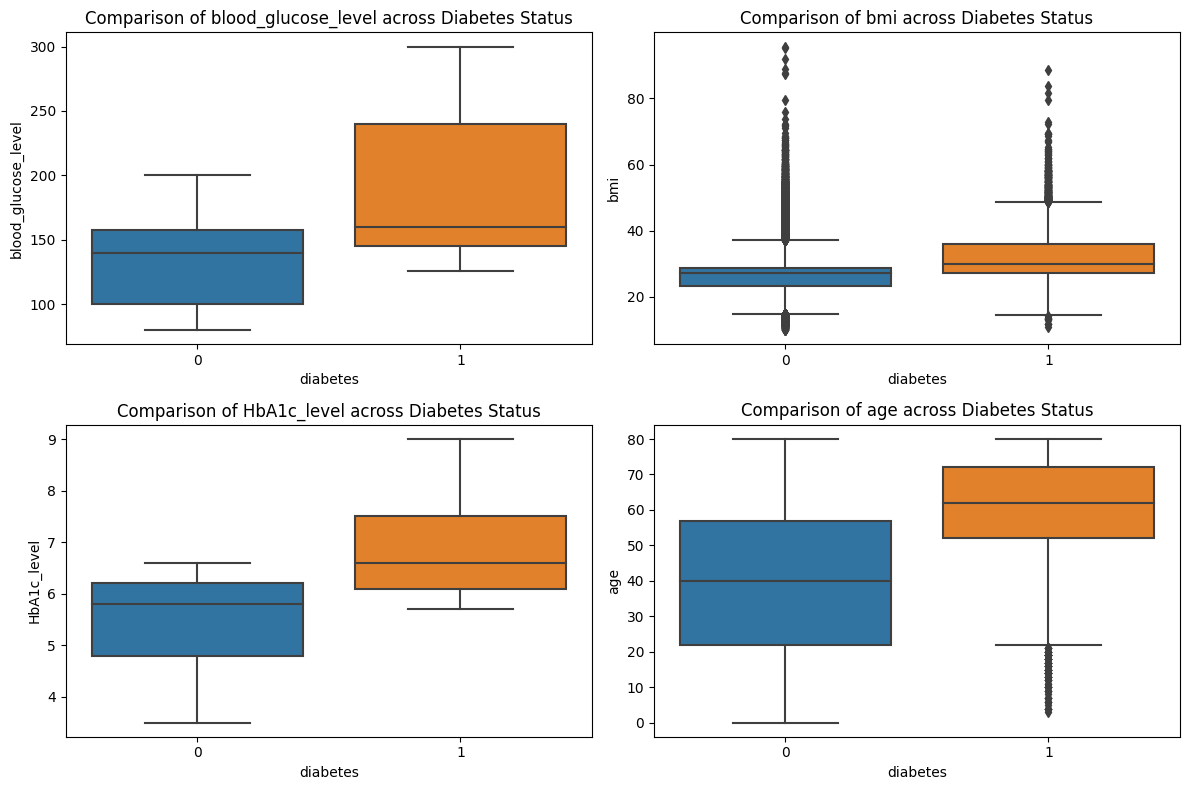

In [15]:
glucose=['blood_glucose_level','bmi','HbA1c_level','age']

fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()
for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='diabetes', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Diabetes Status')

plt.tight_layout()
plt.show()

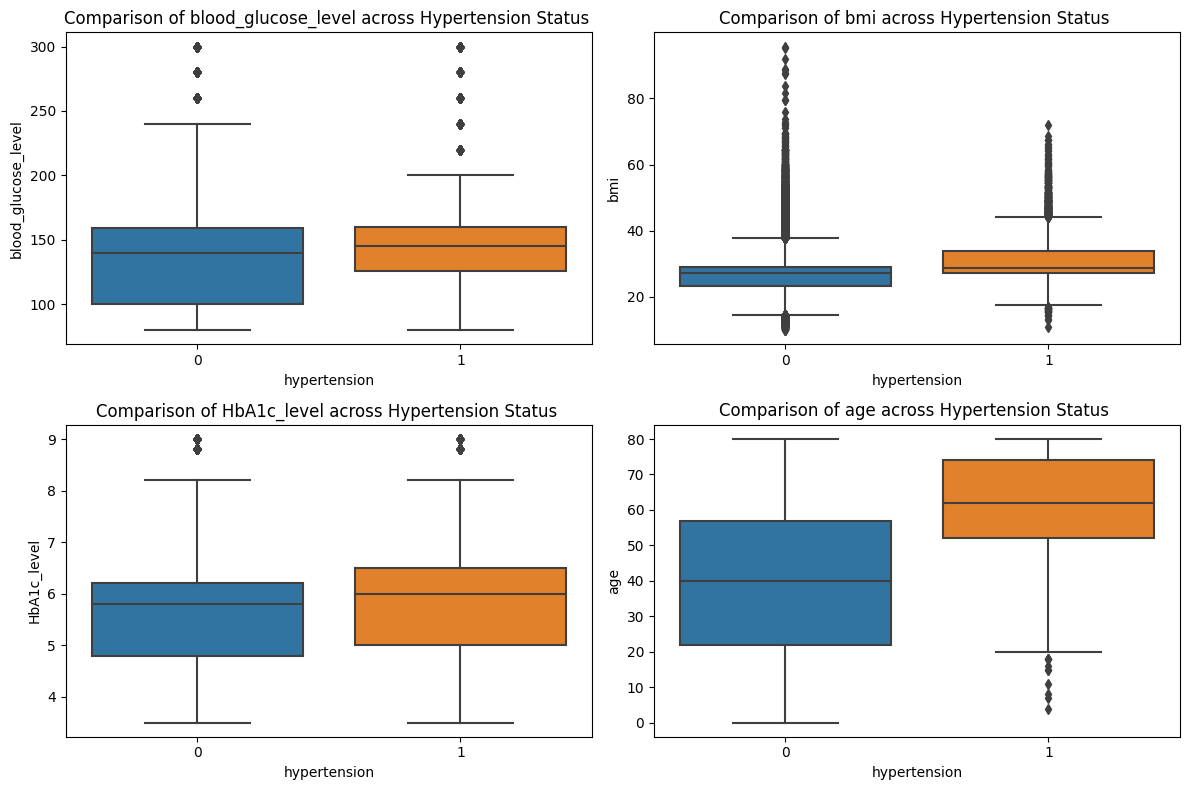

In [16]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='hypertension', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Hypertension Status ')

plt.tight_layout()
plt.show()

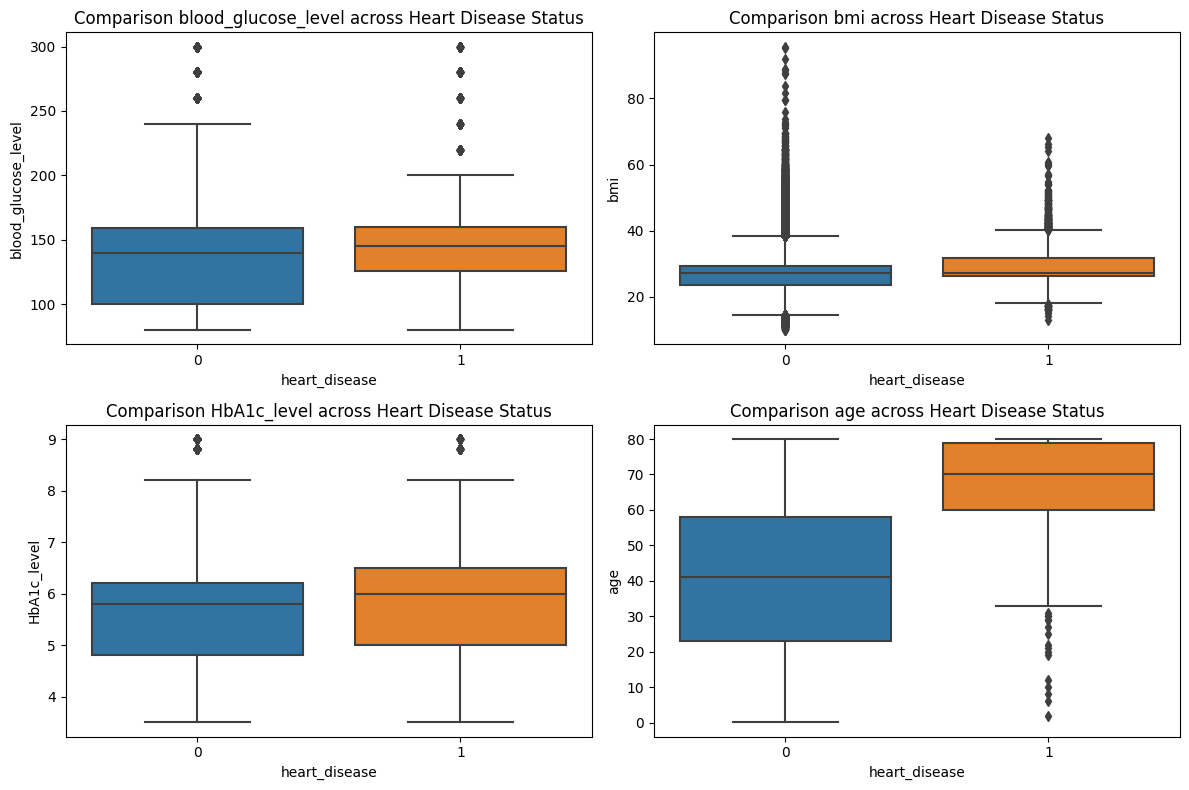

In [17]:
fig, axs=plt.subplots(2,2 , figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='heart_disease', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison {col} across Heart Disease Status')

plt.tight_layout()
plt.show()

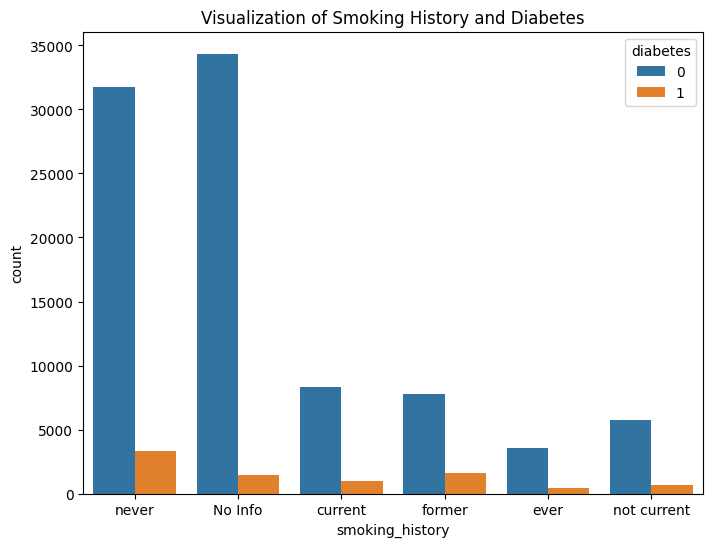

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='smoking_history', hue='diabetes')
plt.title('Visualization of Smoking History and Diabetes')
plt.show()

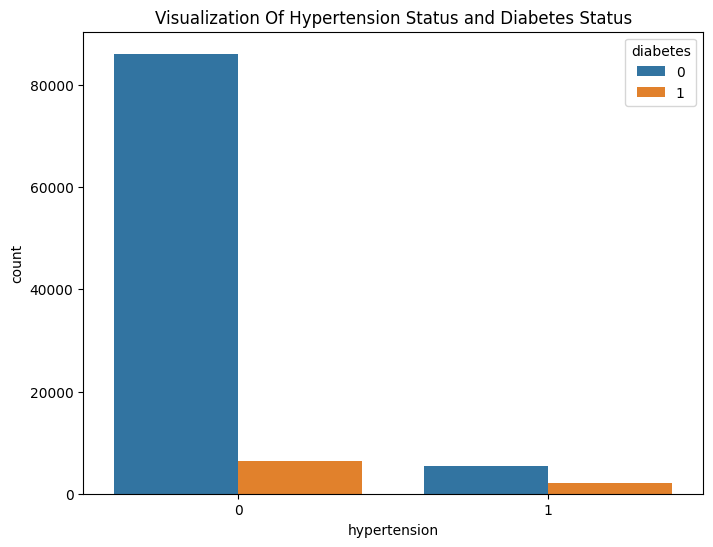

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='hypertension', hue='diabetes')
plt.title('Visualization Of Hypertension Status and Diabetes Status')
plt.show()

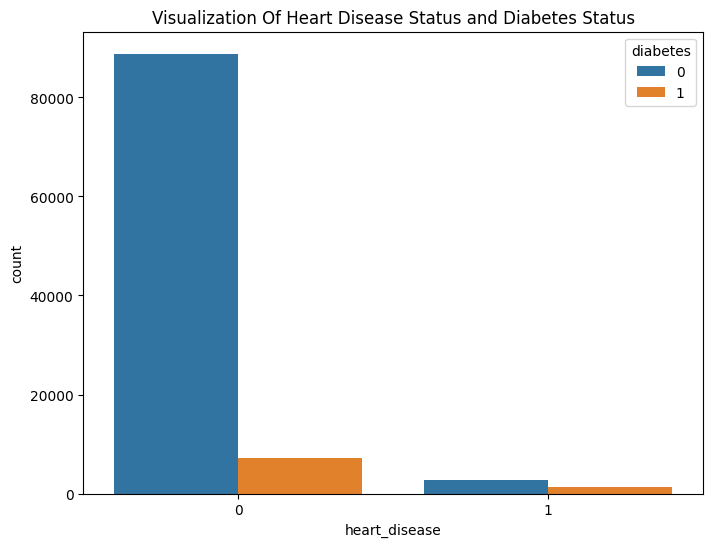

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='heart_disease', hue='diabetes')
plt.title('Visualization Of Heart Disease Status and Diabetes Status')
plt.show()

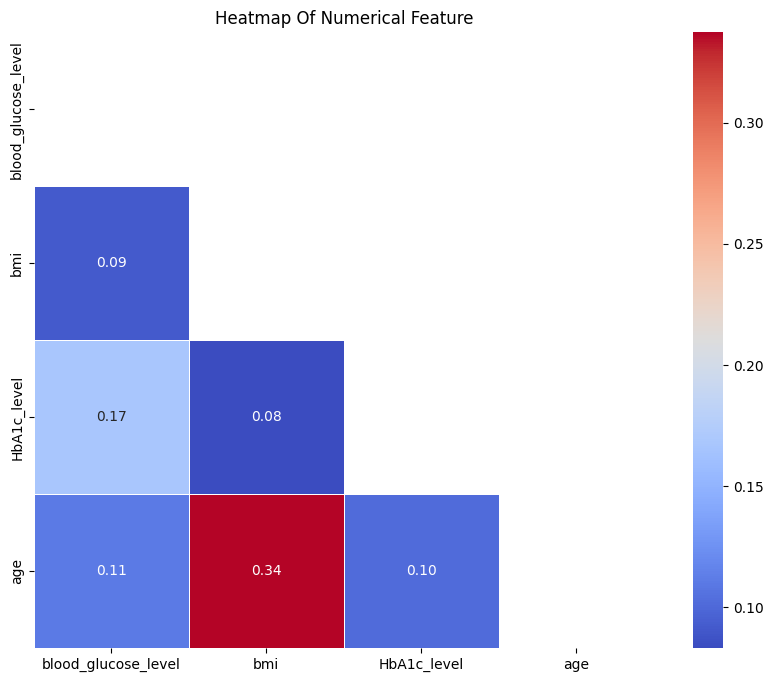

In [21]:
num_column=Diabetes_df[['blood_glucose_level','bmi','HbA1c_level','age']]
corr_num=num_column.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f' )
plt.title('Heatmap Of Numerical Feature')
plt.show()

In [22]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

age
0.72    104
0.80    102
0.64     99
0.56     96
0.88     90
0.32     89
0.24     87
0.48     83
0.40     66
0.16     59
0.08     36
Name: count, dtype: int64

In [23]:
Diabetes_df.loc[Diabetes_df.age <1, 'age']=Diabetes_df.loc[Diabetes_df.age <1, 'age'] *100

In [24]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

Series([], Name: count, dtype: int64)

In [25]:
Diabetes_df=Diabetes_df.drop_duplicates()

In [26]:
Diabetes_df.shape

(96121, 9)

In [27]:
Diabetes_df=Diabetes_df[Diabetes_df['gender'] !='Other']

In [28]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data In Dataframe:", Duplicate)

Duplicate Data In Dataframe: 0


In [29]:
def outlier_handling(df, columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1- 1.5 * IQR
            upper_bound= Q3 + 1.5 * IQR
            df_cleaned=df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    df_cleaned=df_cleaned.reset_index(drop=True)
    return df_cleaned

Diabetes_df=outlier_handling(Diabetes_df, columns=['blood_glucose_level','bmi','age','HbA1c_level'])

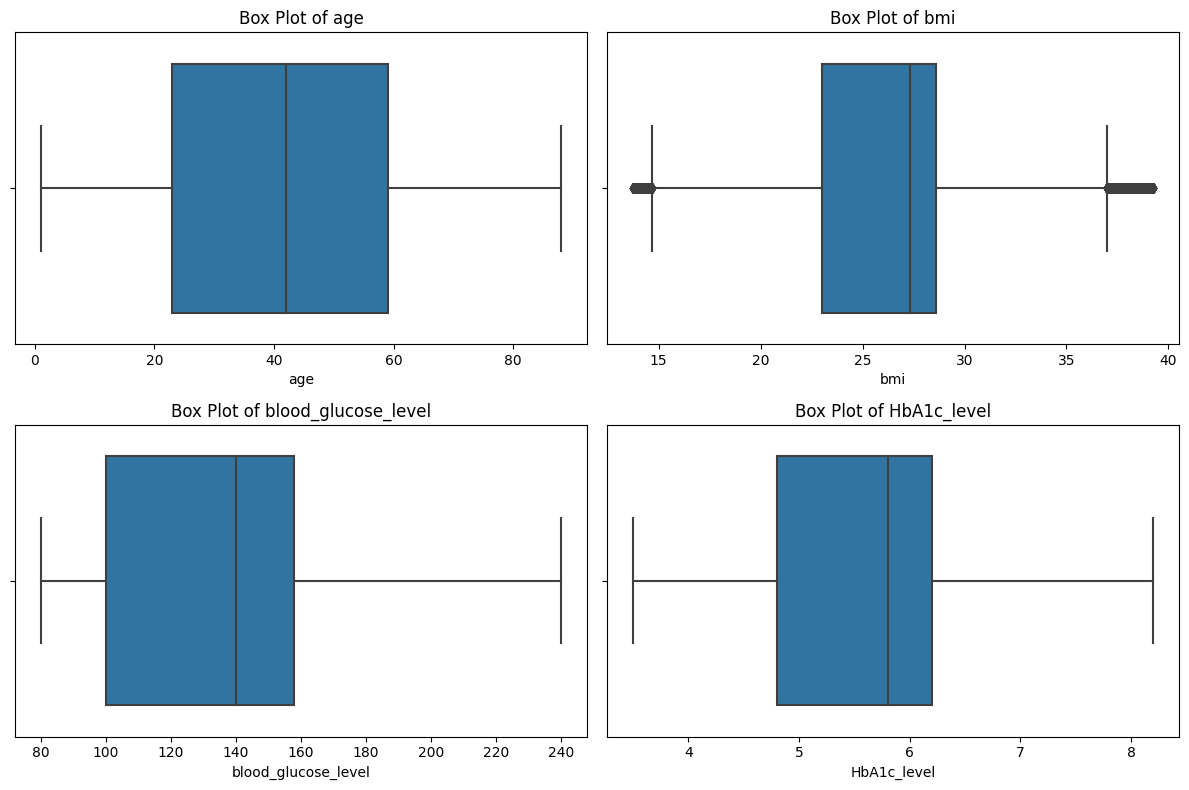

In [30]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=Diabetes_df[col], ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()